Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [135]:
# visualizations were already done for my previous project


In [136]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 999

fighters_df = pd.read_csv("../data/ufc/fighters.csv", index_col=0)

In [137]:
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_l

In [138]:
fighters_df[fighters_df["fighter"] == "Conor McGregor"].sort_values(by="date")

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_l

In [139]:
fighters_df[fighters_df["fighter"] == "Khabib Nurmagomedov"].sort_values(by="date")

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_l

In [140]:
fighters_df[fighters_df["fighter"] == "Nate Diaz"].sort_values(by="date")

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_l

In [141]:
import re

prefix_re = re.compile(r".*(_opponent)|(_ratio)$")
fighters_individual_df = fighters_df[[col for col in fighters_df.columns.drop(["is_winner"]) if not prefix_re.match(col)]]

latest_fights = fighters_individual_df.sort_values(by="date").groupby("fighter").tail(1)

def getByFighter(fighter_name):
    return latest_fights[latest_fights["fighter"] == fighter_name].copy()

getByFighter("Max Holloway")

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,location,longest_win_streak,losses,no_of_rounds,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_landed_ratio,avg_opp_PASS_ratio,avg_opp_REV_ratio,avg_opp_SIG_STR_att_ratio,avg_opp_SIG_STR_landed_ratio,avg_opp_SIG_STR_pct_ratio,avg_opp_SUB_ATT_ratio,avg_opp_TD_att_ratio,avg_opp_TD_landed_ratio,avg_opp_TD_pct_ratio,avg_opp_TOTAL_STR_att_ratio,avg_opp_TOTAL_STR_landed_ratio,current_lose_streak_ratio,current_win_streak_ratio,draw_ratio,longest_win_streak_ratio,losses_ratio,total_rounds_fought_ratio,total_time_fought(seconds)_ratio,total_title_bouts_ratio,win_by_Decision_Majority_ratio,win_by_Decision_Split_ratio,win_by_Decision_Unanimous_ratio,win_by_KO/TKO_ratio,win_by_Submission_ratio,win_by_TKO_Doctor_Stoppage_ratio,wins_ratio,stance_config
86,180.34,175.26,Blake Grice,Orthodox,155.0,27.0,24.631579,17.789474,12.052632,8.736842,163.315789,69.157895,10.421053,7.736842,154.789474,62.842105,0.421053,6.368421,5.0,0.947368,0.0,NaN,NaN,NaN,185.789474,85.631579,0.44,NaN,0.368421,0.315789,0.263158,0.210526,NaN,NaN,194.526316,93.315789,15.631579,8.052632,6.157895,3.736842,132.789474,44.631579,3.105263,1.684211,113.105263,31.157895,0.0,13.315789,10.842105,0.631579,0.052632,NaN,NaN,NaN,142.052632,50.052632,0.358947,NaN,0.157895,5.631579,0.947368,0.15,NaN,NaN,146.210526,53.421053,0.0,13.0,2019-04-13,0.0,Max Holloway,"Atlanta, Georgia, USA",13.0,3.0,5,True,50.0,744.578947,4.0,Lightweight,0.0,1.0,4.0,8.0,2.0,1.0,16.0,1.028821,0.95856,1.0,0.903226,3.147738,3.082648,0.789929,0.896814,1.977439,1.82567,1.255718,1.433388,1.70306,1.532211,0.932566,0.810141,0.7875,1.135965,0.84,NaN,NaN,NaN,0.845201,0.349767,0.589474,0.965479,NaN,NaN,1.498984,1.124883,0.821398,0.795789,1.93364,1.657895,0.926995,0.704605,1.818066,1.449176,0.913043,1.688941,1.680299,0.978947,0.961098,NaN,NaN,NaN,0.593068,2.360393,1.239234,0.961003,NaN,NaN,1.0,3.5,1.0,2.8,0.6

In [142]:
from IPython.display import display

def makeBoutDf(fighter1, fighter2):
    
    fighter1_df = getByFighter(fighter1)
    fighter2_df = getByFighter(fighter2)
    
    fighter1_df["temp_id_"] = fighter2_df["temp_id_"] = np.random.randint(2**31)
    fighter1_df, fighter2_df = (
        pd.merge(fighter1_df, fighter2_df, on="temp_id_", suffixes=("", "_opponent")),
        pd.merge(fighter2_df, fighter1_df, on="temp_id_", suffixes=("", "_opponent")),
    )
    
    fight_df = pd.concat([fighter1_df, fighter2_df])
    
    for col in [col for col in fight_df.select_dtypes(include="number").columns if col.endswith("_opponent")]:

        col2 = col
        col1 = col[:-9]

        fight_df[col1 + "_ratio"] = (fight_df[col1] + 1) / (fight_df[col2] + 1)
    
    fight_df["stance_config"] = fight_df["Stance"] + "-" + fight_df["Stance_opponent"]
    
    return fight_df.drop(columns=["temp_id_", "Referee_opponent"])

bout = makeBoutDf("Kamaru Usman", "Colby Covington")
bout

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,location,longest_win_streak,losses,no_of_rounds,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_landed_ratio,avg_opp_PASS_ratio,avg_opp_REV_ratio,avg_opp_SIG_STR_att_ratio,avg_opp_SIG_STR_landed_ratio,avg_opp_SIG_STR_pct_ratio,avg_opp_SUB_ATT_ratio,avg_opp_TD_att_ratio,avg_opp_TD_landed_ratio,avg_opp_TD_pct_ratio,avg_opp_TOTAL_STR_att_ratio,avg_opp_TOTAL_STR_landed_ratio,current_lose_streak_ratio,current_win_streak_ratio,draw_ratio,longest_win_streak_ratio,losses_ratio,total_rounds_fought_ratio,total_time_fought(seconds)_ratio,total_title_bouts_ratio,win_by_Decision_Majority_ratio,win_by_Decision_Split_ratio,win_by_Decision_Unanimous_ratio,win_by_KO/TKO_ratio,win_by_Submission_ratio,win_by_TKO_Doctor_Stoppage_ratio,wins_ratio,stance_config,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SIG_STatt_opponent,avg_SIG_STlanded_opponent,avg_SIG_STpct_opponent,avg_SUATT_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_TOTAL_STatt_opponent,avg_TOTAL_STlanded_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_

In [143]:
fighters_df["weight_class"].value_counts()

Lightweight              1978
Welterweight             1938
Middleweight             1450
Heavyweight              1014
Light Heavyweight        1004
Featherweight             884
Bantamweight              758
Flyweight                 374
Women's Strawweight       286
Women's Bantamweight      222
Open Weight               184
Women's Flyweight         100
Catch Weight               76
Women's Featherweight      20
Name: weight_class, dtype: int64

In [196]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
    RandomForestRegressor(n_jobs=-1, n_estimators=120)
)

In [197]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(fighters_df)

target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "Referee"])

X_train = train[features]
y_train = train[target].astype(np.int64)

X_test = test[features]
y_test = test[target].astype(np.int64)


In [198]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Stance', 'date', 'fighter', 'location',
                                     'Stance_opponent', 'fighter_opponent',
                                     'weight_class', 'stance_config'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_spl

In [199]:
bout[features]

,Height_cms,Reach_cms,Stance,Weight_lbs,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_landed_ratio,avg_opp_PA

In [200]:
def scoreBout(bout):
    y_pred = pipeline.predict(bout[features])
    return (y_pred[0] + (1 - y_pred[1]))/2

scoreBout(bout)

0.575

In [264]:
def doPrediction(red_fighter, blue_fighter):
    bout = makeBoutDf(red_fighter, blue_fighter)
    score = scoreBout(bout)
    
    if round(score) >= 1:
        winner = red_fighter
    else:
        winner = blue_fighter
        score = 1 - score
        
    return score, winner


(0.5166666666666666, 'Kamaru Usman')

In [283]:
doPrediction("Kamaru Usman", "Colby Covington")

(0.5375, 'Kamaru Usman')

In [284]:
doPrediction("Jorge Masvidal", "Nate Diaz")

(0.5541666666666667, 'Nate Diaz')

In [285]:
doPrediction("Conor McGregor", "Khabib Nurmagomedov")

(0.8208333333333333, 'Khabib Nurmagomedov')

In [286]:
doPrediction("Robert Whittaker", "Israel Adesanya")

(0.5791666666666666, 'Robert Whittaker')

In [287]:
doPrediction("Max Holloway", "Frankie Edgar")

(0.575, 'Max Holloway')

In [288]:
doPrediction("Michelle Waterson", "Joanna Jedrzejczyk")

(0.575, 'Joanna Jedrzejczyk')

In [289]:
doPrediction("Ben Askren", "Robbie Lawler")

(0.7083333333333333, 'Ben Askren')

In [290]:
doPrediction("Ben Askren", "Jorge Masvidal")

(0.5291666666666667, 'Ben Askren')

In [291]:
doPrediction("Alexander Volkanovski", "Max Holloway")

(0.6, 'Max Holloway')

In [292]:
doPrediction("Amanda Nunes", "Germaine de Randamie")

(0.6875, 'Amanda Nunes')

In [293]:
doPrediction("Jon Jones", "Anthony Smith")

(0.775, 'Jon Jones')

In [294]:
doPrediction("Khabib Nurmagomedov", "Dustin Poirier")

(0.7333333333333334, 'Khabib Nurmagomedov')

In [276]:
makeBoutDf("Michelle Waterson", "Joanna Jedrzejczyk")[features]

,Height_cms,Reach_cms,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,draw,fighter,location,longest_win_streak,losses,no_of_rounds,Reach_cms_opponent,Weight_lbs_opponent,age_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_HEAD_att_opponent,avg_LEG_att_opponent,avg_PASS_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_landed_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Unanimous,win_by_Submission,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_landed_ratio,avg_HEAD_att_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TOTAL_STR_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_landed_ratio,avg_opp_LEG_att_ratio,avg_opp_PASS_ratio,avg_opp_REV_ratio,avg_opp_SIG_STR_landed_ratio,avg_opp_SIG_STR_pct_ratio,avg_opp_TD_att_ratio,avg_opp_TD_landed_ratio,avg_opp_TD_pct_ratio,avg_opp_TOTAL_STR_landed_ratio,current_lose_streak_ratio,current_win_streak_ratio,draw_ratio,longest_win_streak_ratio,losses_ratio,total_title_bouts_ratio,win_by_Decision_Majority_ratio,win_by_Decision_Split_ratio,win_by_KO/TKO_ratio,win_by_TKO_Doctor_Stoppage_ratio,wins_ratio
0,160.02,157.48,48.500000,24.166667,11.166667,9.500000,48.000000,23.666667,0.000000,9.000000,7.666667,2.666667,0.166667,73.166667,NaN,NaN,NaN,1.0,NaN,2.666667,1.666667,0.735000,99.333333,70.0,NaN,14.000000,10.166667,14.333333,11.666667,54.333333,19.166667,59.833333,25.833333,0.166667,5.666667,4.333333,0.833333,0.166667,79.500000,0.468333,NaN,NaN,NaN,NaN,1.666667,0.666667,0.458333,NaN,NaN,0.0,2.0,0.0,Michelle Waterson,"Philadelphia, Pennsylvania, USA",2.0,2.0,3,165.10,125.0,31.0,209.636364,93.636364,167.272727,36.181818,0.000000,240.818182,115.181818,NaN,0.272727,0.181818,14.363636,8.000000,11.545455,3.181818,2.454545,119.181818,33.454545,0.181818,10.000000,0.818182,0.000000,0.328182,NaN,9.000000,1.545455,0.159091,62.636364,1.0,0.0,Joanna Jedrzejczyk,8.0,2.0,40.0,1072.909091,0.0,1.0,6.0,2.0,0.0,9.0,False,15.0,687.666667,0.0,Women's Strawweight,0.0,1.0,2.0,4.0,0.954815,0.954124,0.920635,1.062500,0.549403,0.291194,0.916667,0.268949,0.274736,0.306704,0.401669,1.165710,NaN,2.880952,2.256

In [252]:
transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
)

train, test = train_test_split(fighters_df)

X_train = transformer.fit_transform(train[features])
y_train = train[target]

X_test = transformer.transform(test[features])
y_test = test[target]

model = RandomForestClassifier(n_jobs=-1, n_estimators=120)

In [253]:
import eli5
from eli5.sklearn import PermutationImportance

In [254]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [255]:
#from sklearn.metrics import neg

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test, y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

/home/cowley/venv/lambda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


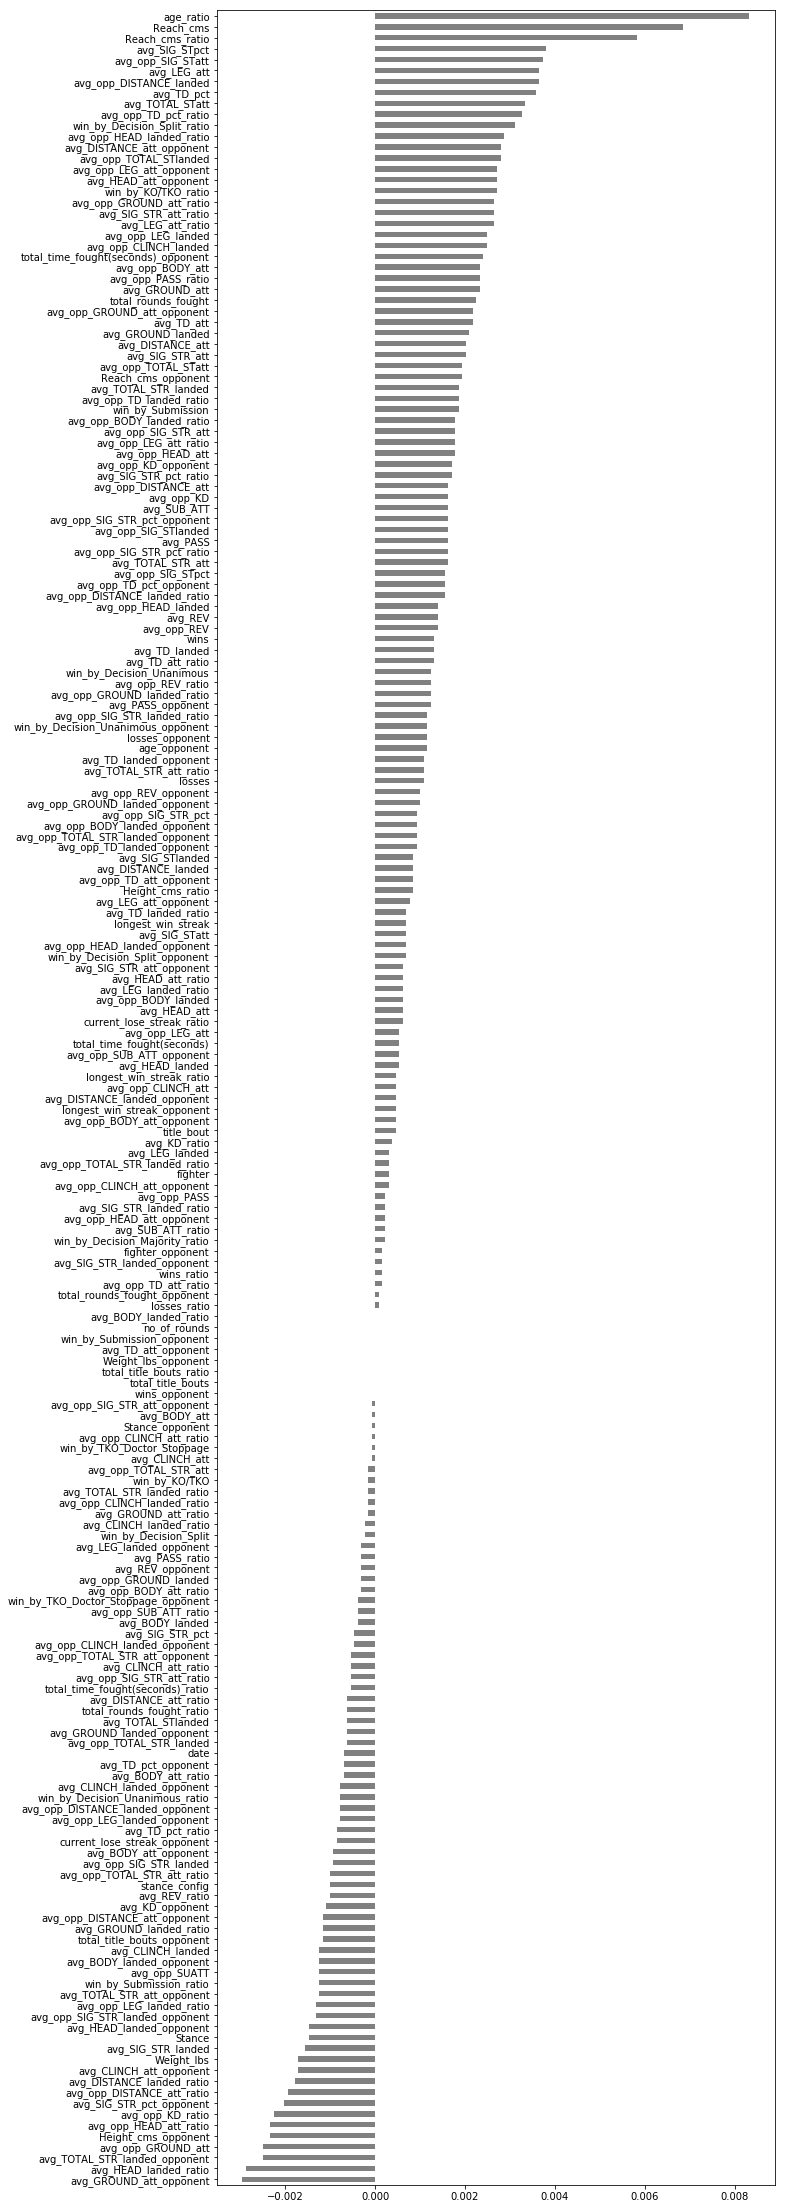

In [256]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 40))

feature_importances = pd.Series(permuter.feature_importances_, features).sort_values()
feature_importances.plot.barh(color="gray", ax=ax)

fig.show()

In [260]:
features = features.drop(feature_importances[feature_importances <= 0].index)

In [261]:
features

Index(['Height_cms', 'Reach_cms', 'avg_DISTANCE_att', 'avg_DISTANCE_landed',
       'avg_GROUND_att', 'avg_GROUND_landed', 'avg_HEAD_att',
       'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att',
       ...
       'current_win_streak_ratio', 'draw_ratio', 'longest_win_streak_ratio',
       'losses_ratio', 'total_title_bouts_ratio',
       'win_by_Decision_Majority_ratio', 'win_by_Decision_Split_ratio',
       'win_by_KO/TKO_ratio', 'win_by_TKO_Doctor_Stoppage_ratio',
       'wins_ratio'],
      dtype='object', length=150)

In [279]:

pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
    RandomForestRegressor(n_jobs=-1, n_estimators=120)
)


train, test = train_test_split(fighters_df)

target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "Referee", "location"] + list(feature_importances[feature_importances <= 0].index))

X_train = train[features]
y_train = train[target].astype(np.int64)

X_test = test[features]
y_test = test[target].astype(np.int64)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [280]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, y_test.replace({True: 1, False: 0}))

0.3855106272680145

In [281]:
pipeline

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['fighter', 'fighter_opponent',
                                     'weight_class'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=0,
                               missing_values=nan, strategy='constant',
                               verbose=0)),
                (...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
               

In [282]:
doPrediction("Petr Yan", "Urijah Faber")

(0.65, 'Petr Yan')